In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

### Exercise 2
In a noise signal, the mixture of frequencies changes over time.
In the long run, we expect the power at all frequencies to be equal,
but in any sample, the power at each frequency is random.

To estimate the long-term average power at each frequency, we can
break a long signal into segments, compute the power spectrum for each segment, and then compute the average across
the segments.  You can read more about this algorithm at
http://en.wikipedia.org/wiki/Bartlett's_method.

Bartlett’s method consists of the following steps:

0. The original N point data segment is split up into K (non-overlapping) data segments, each of length M
0. For each segment, compute the periodogram by computing the discrete Fourier transform (DFT version which does not divide by M), then computing the squared magnitude of the result and dividing this by M.
0. Average the result of the periodograms above for the K data segments.

    - The averaging reduces the variance, compared to the original N point data segment.
    - The end result is an array of power measurements vs. frequency "bin".

在噪聲信號中，頻率混合隨時間變化。從長遠來看，我們希望所有頻率的功率都相等，但是在任何樣本中，每個頻率的功率都是隨機的。

為了估算每個頻率的長期平均功率，我們可以將一個長信號分成多個部分，計算每個部分的功率譜，然後計算各個部分的平均值。您可以在http://en.wikipedia.org/wiki/Bartlett's_method上了解有關此算法的更多信息。

Bartlett的方法包括以下步驟：

0. 原始的N點數據段分為K個（不重疊）數據段，每個數據段的長度為M

0. 對於每個分段，通過計算離散傅立葉變換（不除以M的DFT版本），然後計算結果的平方大小，然後將其除以M，來計算週期圖。

0. 對K個數據段平均以上週期圖的結果。

    - 與原始的N點數據段相比，平均減少了方差。
    - 最終結果是一系列功率測量值與頻率“ bin”的關係。
    
![](https://upload.wikimedia.org/wikipedia/commons/9/9e/Bartl.png)

Implement Bartlett's method and use it to estimate the power spectrum for a noise wave.  

- Hint: look at the implementation of `make_spectrogram`.

實現巴特利特的方法，並用它來估計噪聲波的功率譜。

-提示：看一下make_spectrogram的實現。

In [49]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    
    fs = next(iter(spectrums)).fs  ## 這一行 我比較少用，值得研究一下....
    
    # make a Spectrum with the mean amplitudes
    spectrum = thinkdsp.Spectrum(hs, fs, wave.framerate)
    return spectrum

`bartlett_method` makes a spectrogram and extracts `spec_map`, which maps from times to Spectrum objects.  It computes the PSD for each spectrum, adds them up, and puts the results into a Spectrum object.

`bartlett_method`生成一個頻譜圖並提取`spec_map`，後者從時間映射到Spectrum對象。 它為每個頻譜計算PSD，將它們相加，然後將結果放入Spectrum對象。

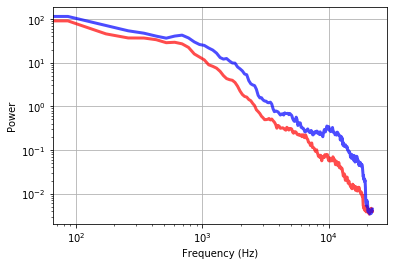

In [50]:
psd=  bartlett_method(segment)
psd2= bartlett_method(segment2)

psd.plot_power(color='red')
psd2.plot_power(color='blue')

thinkplot.config(xlabel='Frequency (Hz)', 
                 ylabel='Power', 
                 xscale='log', 
                 yscale='log')

Now we can see the relationship between power and frequency more clearly.  It is not a simple linear relationship, but it is consistent across different segments, even in details like the notches near 5000 Hz, 6000 Hz, and above 10,000 Hz. 

現在我們可以更清楚地看到功率和頻率之間的關係。 它不是簡單的線性關係，但在不同的段中都是一致的，即使在細節方面，例如5000 Hz，6000 Hz和10,000 Hz以上的陷波。